In [1]:
# 필요한 패키지와 라이브러리를 가져옴
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
mpl.rc('font',family='Malgun Gothic')   # 맑은 고딕으로 그래프한글설정

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns

In [2]:
import numpy as np
import pandas as pd

#회귀모델
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#분류모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report

In [57]:
#데이터불러오기
df = pd.read_csv("../source/05_iris.csv",encoding="cp949")
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [54]:
# 상관관계 확인
df.corr()

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


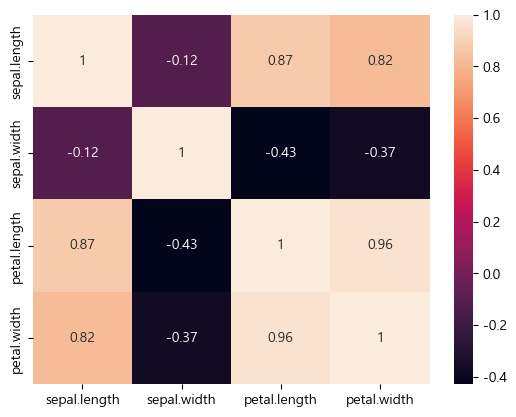

In [55]:
# 상관관계의 시각화 (히트맵 형식) // annot를 사용함으로써 수치를 표기하여 줄 수 있음
sns.heatmap(df.corr(), annot=True)
plt.show()

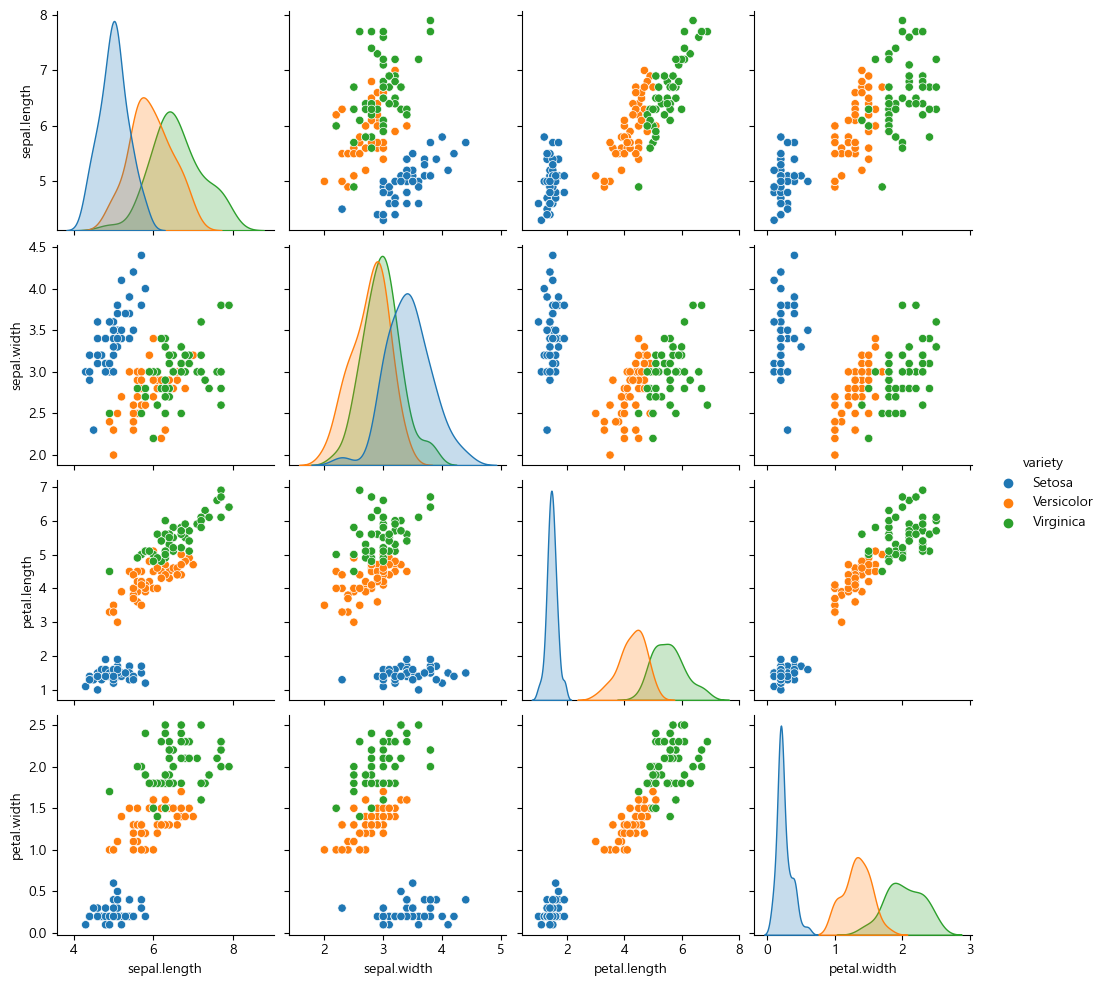

In [58]:
sns.pairplot(df, hue='variety')
plt.show()

In [19]:
# 타겟과 피쳐값 설정
df.columns
feature = df.loc[:, 'sepal.width':'petal.width']
target = df.loc[:,'sepal.length']

In [8]:
#회귀모델
model = LinearRegression()

In [20]:
#학습데이터와 테스트데이터 분리
#Feautre = X
#Target = Y로 자동으로 잡아줌
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, random_state=42)

In [31]:
# 추출된 값의 확인
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 73 to 27
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.width   38 non-null     float64
 1   petal.length  38 non-null     float64
 2   petal.width   38 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [28]:
#모델 생성하고 학습
model = LinearRegression()
#학습
#R의 lm(formula = Sepal.Length ~ Sepal.Width + Petal.Length + Petal.Width, data=train) 동일함 타겟을 토대로 x값을 학습
model.fit(X_train, Y_train)

LinearRegression()

In [30]:
#예측하기
pred = model.predict(X_test)
pred

array([6.3557344 , 5.36663102, 7.13193654, 6.06541754, 6.29435951,
       4.88320311, 5.52278826, 6.10291362, 5.6034365 , 5.68573294,
       6.37422402, 4.74902653, 4.93507476, 4.89052435, 5.21562998,
       6.41197004, 6.63385768, 5.62217606, 6.13629565, 6.35086205,
       4.96358445, 6.2281038 , 4.95870363, 6.41929976, 7.75171453,
       6.11241685, 6.57762203, 6.77291507, 4.61215113, 4.89758716,
       4.77457049, 5.54317602, 6.1903493 , 5.09557904, 4.73708289,
       5.90518017, 6.26340941, 5.08607581])

In [34]:
#평가하기
# RMSE 산출 case 1
# (타겟 - 예측)**2 
RMSE = np.sqrt(np.mean((Y_test - pred)**2))
RMSE

0.31748600958006823

In [36]:
# RMSE 산출 case 2
np.sqrt(mean_squared_error(Y_test, pred))

0.31748600958006823

In [39]:
Y_test

73     6.1
18     5.7
118    7.7
78     6.0
76     6.8
31     5.4
64     5.6
141    6.9
68     6.2
82     5.8
110    6.5
12     4.8
36     5.5
9      4.9
19     5.1
56     6.3
104    6.5
69     5.6
55     5.7
132    6.4
29     4.7
127    6.1
26     5.0
128    6.4
131    7.9
145    6.7
108    6.7
143    6.8
45     4.8
30     4.8
22     4.6
15     5.7
65     6.7
11     4.8
42     4.4
146    6.3
51     6.4
27     5.2
Name: sepal.length, dtype: float64

In [50]:
lm = pd.DataFrame()
lm['test'] = Y_test
lm['pred'] = pred

In [51]:
lm = lm.reset_index()
lm = lm.iloc[:, 1:]
lm

,test,pred
0,6.1,6.355734
1,5.7,5.366631
2,7.7,7.131937
3,6.0,6.065418
4,6.8,6.294360
5,5.4,4.883203
6,5.6,5.522788
7,6.9,6.102914
8,6.2,5.603437
9,5.8,5.685733


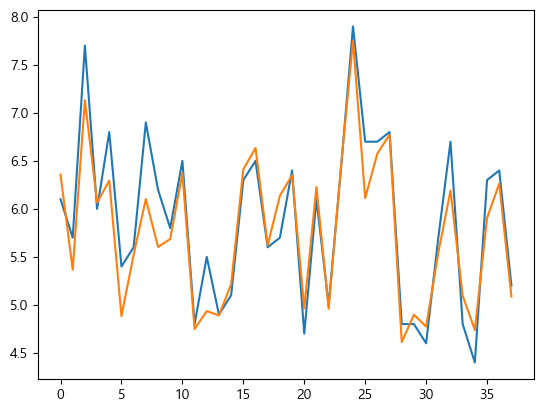

In [53]:
##plt.plot(list(Y_test), 'go-')
##plt.plot(list(pred), 'rx--')
##plt.show()

## 오류날시 lm에 대한 인덱스 리셋할것 (상기 필기 참고)

plt.plot(lm['test'])
plt.plot(lm['pred'])
plt.show()

In [59]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [62]:
#분류모델
#target encoding
feature = df.loc[:, 'sepal.length' : 'petal.width']
target = df.loc[:, 'variety']


In [70]:
#학습데이터와 테스트데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, random_state=42)

In [78]:
#학습 
#fit (feature, target) -> 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
#예측
pred = model.predict(X_test)
pred

array(['Versicolor', 'Setosa', 'Virginica', 'Versicolor', 'Versicolor',
       'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Virginica',
       'Virginica', 'Virginica', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor',
       'Setosa'], dtype=object)

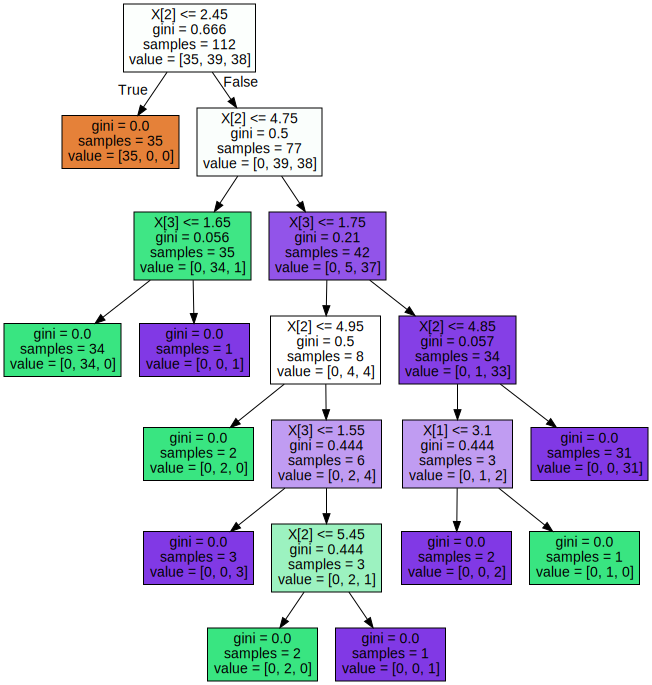

In [84]:
#DecisionTree 시각적 표현
#conda install python-graphviz <- 아나콘다 프롬프트 관리자 권한으로 실행후 설치
from sklearn.tree import export_graphviz
import graphviz

# .dot 파일로 export  
export_graphviz(model, out_file='tree.dot', impurity=True, filled=True)

# 생성된 tree.dot 파일을 읽어서 시각화
with open('tree.dot') as fp:
  dot_graph = fp.read()

graphviz.Source(dot_graph)

In [80]:
#평가
accuracy_score(Y_test , pred)


1.0